## Breast Cancer Predication using Random Forest Algorithm

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore') #Ignore warning

In [3]:
pd.set_option('display.max_column', None) # To display entire columns

### Read Data from CSV file


In [4]:
data = pd.read_csv('cancer_data.csv')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#Drop Unnamed: 32 and ID
data.drop(columns=['Unnamed: 32', 'id'], inplace=True)

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#In diagnosis feature
#M: Malignant make it 1
#B: Benign make it 0
data['diagnosis'] = np.where(data['diagnosis']=='M',1,0)

In [10]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
#Defining Target and Predictor Features
X = data.drop(columns=['diagnosis'], axis=1)
y = data['diagnosis']

### Train Test Split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [13]:
print(f'Shape of training data:{X_train.shape}')
print(f'Shape of testing data:{X_test.shape}')
print(f'Training data of Cancer = Malignant (%) :{y_train.mean()}')
print(f'Training data of Cancer = Benign (%) :{1-y_train.mean()}')
print(f'Test data of Cancer = Malignant (%) :{y_test.mean()}')
print(f'Test data of Cancer = Benign (%) :{1-y_test.mean()}')

#Selected random state 42, my sample should be the good representation of population Randome state, its a seed number
#Percentage of both the type of cancer is statistically equal in train and test data

Shape of training data:(455, 30)
Shape of testing data:(114, 30)
Training data of Cancer = Malignant (%) :0.37142857142857144
Training data of Cancer = Benign (%) :0.6285714285714286
Test data of Cancer = Malignant (%) :0.37719298245614036
Test data of Cancer = Benign (%) :0.6228070175438596


### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42) #Create random forest classifier

In [15]:
#Find out Hyper parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
param = {'max_depth': [2,3,4,5],
        'bootstrap' : [True, False],
        'criterion' : ['gini', 'entropy'],
        'max_features' : ['auto', 'sqrt', 'log2']}
rf_grid = GridSearchCV(rf,param_grid=param,n_jobs=2,cv=10)
rf_grid.fit(X_train, y_train)
print('Best Parameters using GridSearchCV:',rf_grid.best_params_)

Best Parameters using GridSearchCV: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2'}


In [25]:
#Set the best parameter given by GridSearchCV to rf
rf.set_params(bootstrap = True, criterion= 'gini', max_depth= 5, max_features= 'log2')
#Problem: How one should decide the n_estimators (No. of trees to be created)

RandomForestClassifier(max_depth=5, max_features='log2', random_state=42)

### Out of Bag Error Rate (OOB)

In [26]:
#Find error rate for no. of trees starting from 10 to 1000
rf.set_params(oob_score=True,warm_start=True)

n_estimators_min = 10
n_estimators_max = 1000

error_rate = {}
for i in range(n_estimators_min, n_estimators_max+1): #repeat it upto n_estimators_max
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)    #Keep on training for different estimator values
    oob_error = 1-rf.oob_score_
    error_rate[i] = oob_error #Save oob error rate in the dictionary for every estimator value

In [29]:
oob = pd.Series(error_rate) #Cnvert to series
print(oob) #OOB Error rate for each estimator

10      0.059341
11      0.059341
12      0.054945
13      0.052747
14      0.054945
          ...   
996     0.037363
997     0.037363
998     0.037363
999     0.037363
1000    0.037363
Length: 991, dtype: float64


### Plot graph of OOB Error rate accross forest sizes from 10 to 1000

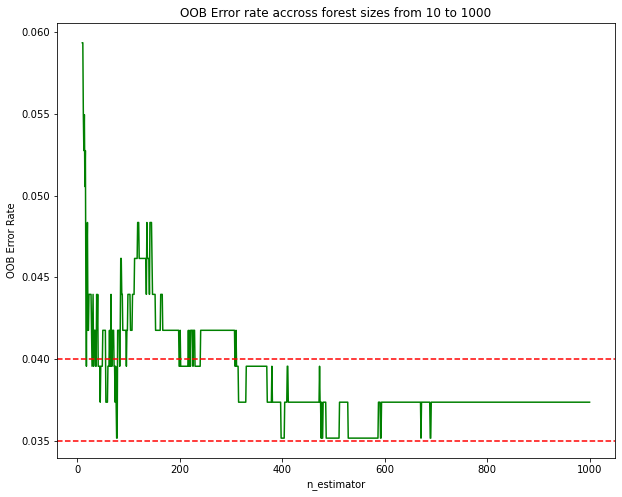

OOB Error rate for 401th tree is: 0.03516


In [43]:
#Graph of n_estimator vs OOB Error rate
plt.figure(figsize=(10,8))
plt.plot(range(10,1001), oob,color='green')
plt.axhline(0.035,linestyle = '--', color='red' )
plt.axhline(0.040,linestyle = '--', color='red' )
plt.title('OOB Error rate accross forest sizes from 10 to 1000')
plt.xlabel('n_estimator')
plt.ylabel('OOB Error Rate')
plt.show()

#Insight from graph: The value of OOB error rate is constant after 400, hence you can take any value from 400 to 1000
#But, we will take 401. If n_estimator is more then more trees will be created, hence more computational power will be used
print('OOB Error rate for 401th tree is: {0:.5f}'.format(oob[401]))

In [46]:
#Reset the hyperparameter for classifier
rf.set_params(n_estimators = 401, oob_score=False,warm_start=False)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=401,
                       random_state=42)

### Train the Random Forest Tree

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=401,
                       random_state=42)

### Variable Importance

In [61]:
imp_features = pd.DataFrame(rf.feature_importances_, index=X_train.columns,
                            columns=['Important Features']).sort_values(by='Important Features', ascending=False)

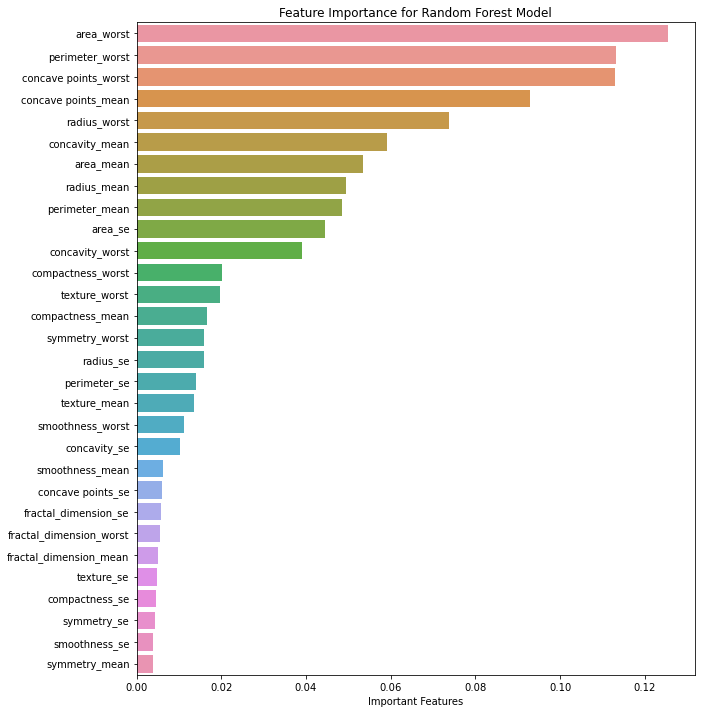

In [62]:
#Plot important Features
plt.figure(figsize=(10,12))
sns.barplot(data=imp_features, x='Important Features', y=imp_features.index)
plt.title('Feature Importance for Random Forest Model')
plt.show()

### Model Evaluation

In [65]:
y_pred = rf.predict(X_test) #Predict method will give 50% probability, its probability is >0.5 then it will be class 1

In [66]:
from sklearn import metrics

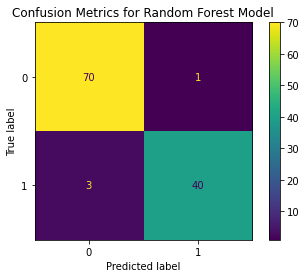

In [73]:
#Confusion Metrics for Decision Tree
metrics.plot_confusion_matrix(rf,X_test, y_test )
plt.title('Confusion Metrics for Random Forest Model')
plt.show()

### Classification Report

In [82]:
target_names =['Benign', 'Malignant']
print('Classification report for Random Forest')
print(metrics.classification_report(y_pred, y_test, target_names=target_names))

Classification report for Random Forest
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97        73
   Malignant       0.93      0.98      0.95        41

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

